## Visualizing n random or representative cell in a given well
- Inputs are:
    -  **file_name** - .sql file path for the target plate(or a dataframe)
    -  **well_name** - Well name
    -  **n_cells** - number of single cells you want to visualize
    -  **box_size** - size of box in pixels for cropping a cell
    -  **channels** - list of channels you want to plot
    -  **cell_selection_method** - can be one of the following methods
        - random - generate n randomly selected cells
        - representative - clusters the data and sample from the "closest to mean cluster"
        - geometric_median - plots single sample than is the geometric median of samples
        
        
#### Steps:

- Reading the target well from the input plate 
- Sampling using cell_selection_method 
  

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from utils import read_data, visualize_data
from utils.read_data import *
from utils.visualize_data import *
from sklearn.cluster import KMeans
import time

### Inputs

In [10]:
file_name='/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/\
workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015195/SQ00015195.sqlite'

n_cells=6

box_size=100

well_name=["A10"]

# repEnabled= True
# how we select cells which can be 'random','representative','geometric_median'
cell_selection_method='geometric_median'

channels=["Mito","AGP","DNA","RNA","ER","Outline"]

In [7]:
# python restore_intelligent.py imaging-platform "projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015195/"

### Read single cell data

In [4]:
%%time
df_p_s0=readSingleCellData_sqlalch_well_subset(file_name,well_name);

time elapsed: 2.681213176250458
(9, 658) [82, 83, 84, 85, 86, 87, 88, 89, 90]
time elapsed: 1.0618049542109171
CPU times: user 5.13 s, sys: 4 s, total: 9.14 s
Wall time: 3min 49s


In [43]:
# df_p_s0[df_p_s0.columns[df_p_s0.columns.str.contains('utline')]]
df_p_s0.columns[df_p_s0.columns.str.contains('Image_Width_OrigDNA')]

Index(['Image_Width_IllumAGP', 'Image_Width_IllumDNA', 'Image_Width_IllumER',
       'Image_Width_IllumMito', 'Image_Width_IllumRNA', 'Image_Width_OrigAGP',
       'Image_Width_OrigDNA', 'Image_Width_OrigER', 'Image_Width_OrigMito',
       'Image_Width_OrigRNA'],
      dtype='object')

In [49]:
df_p_s.shape

(270, 2453)

In [35]:
df_p_s["Image_Metadata_Site"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
265    9.0
266    9.0
267    9.0
268    9.0
269    9.0
Name: Image_Metadata_Site, Length: 270, dtype: float64

### Visualize

<IPython.core.display.Javascript object>


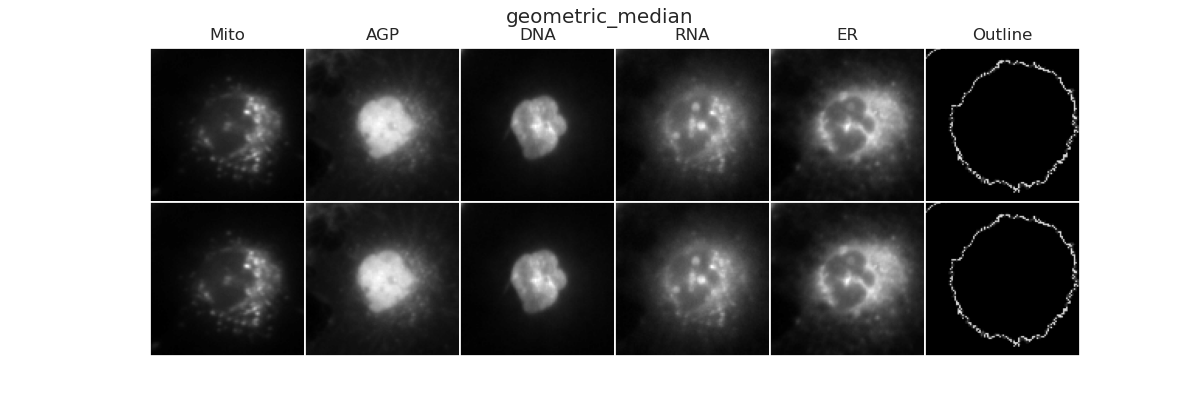

geometric_median


In [47]:
df_p_s=df_p_s0.copy()

images_dir="/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/"

for ch in channels[:-1]:
    df_p_s["PathName_Orig"+ch]=images_dir+"images/"+df_p_s["Image_Metadata_Plate"].astype(str)
    df_p_s["FileName_Orig"+ch]=df_p_s["Image_FileName_Orig"+ch].apply(lambda x: x.replace("tiff","png"))

outlines_root_dir='/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/2016_04_01_a549_48hr_batch1_Mito_Project/'
df_p_s["Path_Outlines"] = outlines_root_dir+df_p_s["Image_Metadata_Plate"].astype(str)+'/analysis/'+df_p_s["Image_Metadata_Well"]+'-'+\
df_p_s["Image_Metadata_Plate"].astype(str)+'/outlines/'+df_p_s["Image_Metadata_Well"]+'_s'+\
df_p_s["Image_Metadata_Site"].astype(int).astype(str)+'--cell_outlines.png'



# cp_features, cp_features_analysis =  extract_feature_names(df_p_s);
    
df_samples = extract_single_cell_samples(df_p_s,n_cells,cell_selection_method);
    
visualize_n_SingleCell(channels,df_samples,box_size,title=cell_selection_method,compressed=True,compressed_im_size=1080);

In [48]:
# ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/2016_04_01_a549_48hr_batch1_Mito_Project/SQ00015195/analysis/A10-SQ00015195/outlines/

In [6]:
ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/

2016_04_01_a549_48hr_batch1/             2017_12_05_Batch2/
2016_04_01_a549_48hr_batch1_compressed/  workspace/


In [9]:
# def unarchive_file(f2unarchive,bucket_name,user_profile):
#     """
#     unarchive input file

#     Inputs:
#     bucket_name: eg, pooled-cell-painting, imaging-plateform
#     user_profile: profile name that is used for accessing the above bucket (check in sudo vim ~/.aws/credentials)
#     proj_path: path to the project eg,2018_11_20_Periscope_Calico/workspace/analysis/

#     output:
#     command to run
#     """

#     cmd='aws s3api  restore-object  --profile '+user_profile+\
#             ' --bucket '+bucket_name+'  --key projects/2018_11_20_Periscope_Calico/workspace/analysis/'+f2unarchive+'   --restore-request GlacierJobParameters={"Tier"="Standard"}'
#     return cmd




# for p in plates:
#     for w in wells:
#         for s in sites:
#             f2unarchive=batch+'/'+p+'-'+w+'-'+s+'/CorrDNA_Site_'+s+'_Overlay.png'
#             cmd='aws s3api  restore-object  --profile '+user_profile+\
#             ' --bucket '+bucket_name+'  --key projects/2018_11_20_Periscope_Calico/workspace/analysis/'+f2unarchive+'   --restore-request GlacierJobParameters={"Tier"="Standard"}'
#             print(cmd)
# #             os.system(cmd)